In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
%matplotlib inline

In [124]:
dataset = pd.read_csv('data/ex2data1.txt', sep = ',')
X = dataset.iloc[:, :2].values
y = dataset.iloc[:, 2].values

In [128]:
X = np.c_[np.ones(X.shape[0]), X]
theta_0 = np.zeros(X.shape[1])

In [125]:
def plot_data(X, y, label_x, label_y, label_pos, label_neg):
    pos = y == 1
    neg = y == 0
    plt.figure()
    plt.plot(X[pos][:, 1], X[pos][:, 2], 'k+', ms=7, label=label_pos)
    plt.plot(X[neg][:, 1], X[neg][:, 2], 'yo', ms=7, label=label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.xlim(28, 109)
    plt.ylim(28, 109)
    plt.legend(numpoints=1, loc=1)

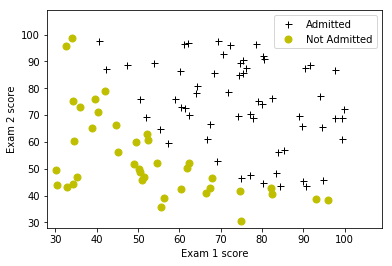

In [131]:
plot_data(X, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')

In [39]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [108]:
def cost_function(theta, X, y):
    m = np.size(y)
    J = 0
    h = sigmoid(theta.dot(X.T))
    
    J = (1 / m) * (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    return J, grad

In [110]:
cost, grad = cost_function(theta_0, X, y)

In [113]:
res = minimize(cost_function, theta_0, args=(X, y), method = None, jac=True, options={'maxiter': 400})

In [116]:
theta = res['x']
print('Cost at best-fit theta: %.3f' % res['fun'])
print('Best-fit theta:', ', '.join('%.3f' % item for item in theta))

Cost at best-fit theta: 0.205
Best-fit theta: -24.870, 0.203, 0.200


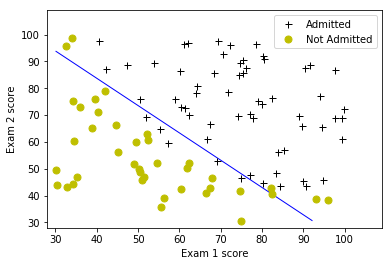

In [133]:
plot_data(X, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
X1_min, X1_max = X[:, 1].min(), X[:, 1].max()
X2_min, X2_max = X[:, 2].min(), X[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(X1_min, X2_max), np.linspace(X2_min, X2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')